<a href="https://polly.elucidata.io/manage/workspaces?action=open_polly_notebook&amp;source=github&amp;path=ElucidataInc%2Fpolly-python%2Fblob%2Fmain%2Fconsumption_starter_notebooks%2Fmutation-polly-python-tcga.ipynb&amp;kernel=elucidata%2FGenomics-hail&amp;machine=medium" target="_parent"><img alt="Open in Polly" src="https://elucidatainc.github.io/PublicAssets/open_polly.svg"/></a>


# Welcome to polly-python notebook for analysis of Mutation data in TCGA OmixAtlas

This notebook allows you to get started with your analysis. You can use this notebook as base for further analytical work you might be interested to do.

<blockquote>When you first open the notebook, please run the code cells below.</blockquote>

For more details on how to use Notebooks on Polly, please visit [Polly Notebooks](https://docs.elucidata.io/Scaling%20compute/Polly%20Notebooks.html).

For more details on API access to your OmixAtlas, please visit [Accessing OmixAtlas using polly-python through Polly Notebooks](https://docs.elucidata.io/OmixAtlas/Polly%20Python.html)

In [27]:
# please do not modify
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)

In [6]:
!sudo pip3 install polly-python==0.0.9 --quiet

You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.


In [28]:
restartkernel() #Pause for a few seconds before the kernel is refreshed

In [142]:
# please do not modify
from IPython.display import HTML
HTML('''<script type="text/javascript"> Jupyter.notebook.kernel.execute("url = '" + window.location + "'", {}, {}); </script>''')

In [1]:
import os
from polly.omixatlas import OmixAtlas
import pandas as pd
import urllib.parse as urlparse
from urllib.parse import parse_qs
import numpy as np
import cmapPy

In [7]:
AUTH_TOKEN=(os.environ['POLLY_REFRESH_TOKEN']) # Obtain authentication tokens
omixatlas = OmixAtlas(AUTH_TOKEN)

In [146]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Load repository and dataset details

In [107]:
dataset_id = "ACC_Mutation_TCGA-OR-A5J1-01A-11D-A29I-10"
repo_id = "15"
file_name=dataset_id +'.gct'
repo_name = "tcga"

## Querying dataset

In [108]:
query=f"SELECT * FROM {repo_name}.datasets WHERE dataset_id = '{dataset_id}'"
results=omixatlas.query_metadata(query)
results

Query execution succeeded
Fetched 1 rows


,disease,kw_disease_type,kw_disease_stage,kw_sample_type,gender_x,kw_vital_status,kw_molecular_subtype,kw_drug,publication,patient_id,tissue,organism,dataset_id,kw_data_type,description,kw_cell_line,kw_cell_type,dataset_source,curation_version,total_num_samples,kw_repo,kw_package,kw_key,kw_bucket,kw_filetype,kw_region,kw_location,kw_timestamp
0,[Adrenocortical Carcinoma],None,None,Tumor,gender,vital_status,COC3,[none],https://pubmed.ncbi.nlm.nih.gov/27165744/,TCGA-OR-A5J1-01A,[adrenal gland],Homo sapiens,ACC_Mutation_TCGA-OR-A5J1-01A-11D-A29I-10,Mutation,Adrenocortical carcinoma RNASeq data for TCGA-...,[None],[None],TCGA,g3,1,tcga,TCGA_data_lake/data,TCGA_data_lake/data/ACC/Mutation/ACC_Mutation_...,discover-prod-datalake-v1,gct,us-west-2,https://discover-prod-datalake-v1.s3-us-west-2...,1642896102816


## Download and load the .gct file

Mutation dataset is stored in gct file. A HEAD file (.gct) file that provides a scalable way of keeping track of data together with learned annotations. An gct file can be read in python using pandas.

In [112]:
data = omixatlas.download_data(repo_id, dataset_id)
url = data.get('data').get('attributes').get('download_url')
status = os.system(f"wget -O '{file_name}' '{url}'")
if status == 0:
    print("Downloaded data successfully")
else:
    raise Exception("Download not successful")

Downloaded data successfully


## Work with a .gct file
A GCT file (.gct) is a tab-delimited text file that contains gene expression data. It contains both expression data and sample metadata in one file. Please read more about GCT file format here.

We store transcriptional (bulk), proteomics and metabolomics data in gct format. A gct file can be read both in R and Python using cmapR (for R) and cmapPy (for Python). Both the packages are installed in this environment and can be used on the datalake files.

In [122]:
import pandas as pd
import cmapPy
from cmapPy.pandasGEXpress.parse_gct import parse

gct_obj = parse(file_name) ## Parse the file to create a gct object
df = gct_obj.data_df ## Extract the dataframe from the gct object
col_metadata = gct_obj.col_metadata_df # Extract the column metadata from the gct object
row_metadata = gct_obj.row_metadata_df # Extract the row metadata from the gct object

In [119]:
row_metadata

rhd,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_File,Sequencer,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,Exon_Number,t_depth,...,ASN_MAF,EAS_MAF,EUR_MAF,SAS_MAF,AA_MAF,EA_MAF,CLIN_SIG,SOMATIC,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,IMPACT,PICK,VARIANT_CLASS,TSL,HGVS_OFFSET,PHENO,MINIMISED,ExAC_AF,ExAC_AF_Adj,ExAC_AF_AFR,ExAC_AF_AMR,ExAC_AF_EAS,ExAC_AF_FIN,ExAC_AF_NFE,ExAC_AF_OTH,ExAC_AF_SAS,GENE_PHENO,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
rid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PTCHD2_c.477G>A,PTCHD2,57540,BCM,GRCh38,chr1,11501469,11501469,+,Silent,SNP,G,G,A,novel,NaN,TCGA-OR-A5J1-01A-11D-A29I-10,TCGA-OR-A5J1-10A-01D-A29L-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somatic,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,352062e7-9b06-41cd-880c-38fe268c9bf3,1d288ab9-ab2d-4483-af84-f5d0f5837cda,c.477G>A,p.=,p.L159L,ENST00000294484,2/21,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOW,1.0,SNV,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PASS,CAGCTGCATCT,1b0913fe-eb9a-4705-8cb4-46cf489073ee,f2c324d9-a27a-4e65-8eb7-d4d51e4725de,efcce26c-2daa-4450-b10a-b2380aa6cc03,b3164f7b-c826-4e08-9ee6-8ff96d29b913,NaN,NaN,TRUE,Unknown
VPS13D_c.552T>G,VPS13D,55187,BCM,GRCh38,chr1,12249327,12249327,+,Silent,SNP,T,T,G,novel,NaN,TCGA-OR-A5J1-01A-11D-A29I-10,TCGA-OR-A5J1-10A-01D-A29L-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somatic,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,352062e7-9b06-41cd-880c-38fe268c9bf3,1d288ab9-ab2d-4483-af84-f5d0f5837cda,c.552T>G,p.=,p.A184A,ENST00000620676,6/70,137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOW,1.0,SNV,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PASS,AATGCTGTGAA,1b0913fe-eb9a-4705-8cb4-46cf489073ee,f2c324d9-a27a-4e65-8eb7-d4d51e4725de,efcce26c-2daa-4450-b10a-b2380aa6cc03,b3164f7b-c826-4e08-9ee6-8ff96d29b913,NaN,NaN,TRUE,Unknown
PHC2_c.1542G>A,PHC2,1912,BCM,GRCh38,chr1,33354414,33354414,+,Silent,SNP,C,C,T,rs557095087,byCluster;byFrequency,TCGA-OR-A5J1-01A-11D-A29I-10,TCGA-OR-A5J1-10A-01D-A29L-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somatic,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,352062e7-9b06-41cd-880c-38fe268c9bf3,1d288ab9-ab2d-4483-af84-f5d0f5837cda,c.1542G>A,p.=,p.P514P,ENST00000257118,8/14,124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOW,1.0,SNV,1.0,NaN,NaN,1,0.000016,0.000017,0.000000,0.000086,0.000000,0.000000,0.000015,0.000000,0.000000,NaN,PASS,GGGGACGGCTG,1b0913fe-eb9a-4705-8cb4-46cf489073ee,f2c324d9-a27a-4e65-8eb7-d4d51e4725de,efcce26c-2daa-4450-b10a-b2380aa6cc03,b3164f7b-c826-4e08-9ee6-8ff96d29b913,NaN,COSM4031595,TRUE,Unknown
DNMT3A_c.363A>T,DNMT3A,1788,BCM,GRCh38,chr2,25282526,25282526,+,Silent,SNP,T,T,A,novel,NaN,TCGA-OR-A5J1-01A-11D-A29I-10,TCGA-OR-A5J1-10A-01D-A29L-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somatic,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,352062e7-9b06-41cd-880c-38fe268c9bf3,1d288ab9-ab2d-4483-af84-f5d0f5837cda,c.363A>T,p.=,p.A121A,ENST00000264709,4/23,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOW,1.0,SNV,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PASS,TCAGCTGCACC,1b0913fe-eb9a-4705-8cb4-46cf489073ee,f2c324d9-a27a-4e65-8eb7-d4d51e4725de,efcce26c-2daa-4450-b10a-b2380aa6cc03,b3164f7b-c826-4e08-9ee6-8ff96d29b913,NaN,NaN,TRUE,Unknown
TTN_c.36370A>G,TTN,7273,BCM,GRCh38,chr2,178636434,178636434,+,Missense_Mutation,SNP,T,T,C,novel,NaN,TCGA-OR-A5J1-01A-11D-A29I-10,TCGA-OR-A5J1-10A-01D

In [121]:
col_metadata

chd,patient,barcode,sample,shortLetterCode,definition,sample_submitter_id,sample_type_id,sample_id,sample_type,days_to_collection,state,initial_weight,pathology_report_uuid,submitter_id,oct_embedded,is_ffpe,tissue_type,synchronous_malignancy,ajcc_pathologic_stage,tumor_stage,days_to_diagnosis,last_known_disease_status,tissue_or_organ_of_origin,age_at_diagnosis,primary_diagnosis,year_of_diagnosis,prior_malignancy,prior_treatment,ajcc_pathologic_t,morphology,ajcc_pathologic_n,ajcc_clinical_m,classification_of_tumor,diagnosis_id,site_of_resection_or_biopsy,icd_10_code,tumor_grade,progression_or_recurrence,alcohol_history,exposure_id,...,disease_type,releasable,name,released,paper_patient,paper_Histology,paper_C1A.C1B,paper_mRNA_K4,paper_MethyLevel,paper_miRNA.cluster,paper_SCNA.cluster,paper_COC,paper_OncoSign,paper_purity,paper_ploidy,paper_genome_doublings,paper_ADS,Histology,C1A.C1B,mRNA_K4,MethyLevel,miRNA.cluster,SCNA.cluster,COC,OncoSign,purity,ploidy,genome_doublings,ADS,subtype,kw_curated_cell_line,kw_curated_cell_type,kw_curated_genetic_mod_type,kw_curated_modified_gene,kw_curated_tissue,kw_curated_drug,kw_curated_disease,curated_age_unit,curated_min_age,curated_max_age
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TCGA-OR-A5J1-01A-11D-A29I-10,TCGA-OR-A5J1,TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J1-01A,TP,Primary solid Tumor,TCGA-OR-A5J1-01A,1,e4038ebb-6e6d-44b1-84ad-e35aafca7b70,Primary Tumor,4691,released,40,8866FD87-4F6F-4D7E-B99A-7DD427ED3BB3,TCGA-OR-A5J1,true,FALSE,Not Reported,No,Stage II,stage ii,0,not reported,Cortex of adrenal gland,21496,Adrenal cortical carcinoma,2000,no,No,T2,8370/1,N0,M0,not reported,dfc14ce8-e9f1-502e-9757-cf37f4378325,Cortex of adrenal gland,C74.0,not reported,not reported,Not Reported,72136fa5-9f4c-5bc2-9736-1a648ed35a9a,...,Adenomas and Adenocarcinomas,TRUE,Adrenocortical Carcinoma,TRUE,TCGA-OR-A5J1,Usual Type,C1A,steroid-phenotype-high+proliferation,CIMP-high,miRNA_1,Quiet,COC3,CN2,0--9,1--95,0,-0--08,Usual Type,C1A,steroid-phenotype-high+proliferation,CIMP-high,miRNA_1,Quiet,COC3,CN2,0--9,1--95,0,-0--08,COC3,none,none,none,none,adrenal gland,none,Adrenocortical Carcinoma,Years,58.0,58.0


In [124]:
df

cid,TCGA-OR-A5J1-01A-11D-A29I-10
rid,
PTCHD2_c.477G>A,1.0
VPS13D_c.552T>G,1.0
PHC2_c.1542G>A,1.0
DNMT3A_c.363A>T,1.0
TTN_c.36370A>G,1.0
TMEM40_c.424+1G>C,1.0
TRAK1_c.2739C>T,1.0
ZNF660_c.*59G>A,1.0
SCFD2_c.726A>C,1.0


## Converting from .gct to .maf file format

Analyze and visualize Mutation Annotation Format (MAF) files from large scale sequencing studies. This R package provides various functions to perform most commonly used analyses in cancer genomics and to create feature rich customizable visualzations with minimal effort.

To know more, check out the following resources:
1. publication: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6211645/
2. Bioconductor: https://www.bioconductor.org/packages/release/bioc/html/maftools.html
3. Github: https://github.com/PoisonAlien/maftools

In [ ]:
omixatlas.format_converter(repo_id, dataset_id, "maf")

## Working with maftools

### Import maftools

In [49]:
library(maftools)

### Open the .maf file converted above

In [102]:
file_name_maf = paste(dataset_id,'.maf', sep="")

In [91]:
maf_obj = read.maf(file_name_maf)

-Reading
-Validating
-Silent variants: 15 
-Summarizing
-Processing clinical data
--Missing clinical data
-Finished in 0.036s elapsed (0.068s cpu) 


In [93]:
maf_obj

An object of class  MAF 
                  ID summary Mean Median
1:        NCBI_Build  GRCh38   NA     NA
2:            Center     BCM   NA     NA
3:           Samples       1   NA     NA
4:            nGenes      18   NA     NA
5: Missense_Mutation      20   20     20
6:       Splice_Site       1    1      1
7:             total      21   21     21

### Get sample and gene summary from the .maf file

In [94]:
getSampleSummary(maf_obj)

Tumor_Sample_Barcode,Missense_Mutation,Splice_Site,total
<fct>,<int>,<int>,<dbl>
TCGA-OR-A5J1-01A-11D-A29I-10,20,1,21


In [95]:
getGeneSummary(maf_obj)

Hugo_Symbol,Missense_Mutation,Splice_Site,total,MutatedSamples,AlteredSamples
<chr>,<int>,<int>,<dbl>,<int>,<int>
KIAA1671,4,0,4,1,1
ANK2,1,0,1,1,1
BEX5,1,0,1,1,1
DDO,1,0,1,1,1
FRAS1,1,0,1,1,1
HIST1H3B,1,0,1,1,1
KLHDC4,1,0,1,1,1
KLHL3,1,0,1,1,1
KLRB1,1,0,1,1,1


In [97]:
getFields(maf_obj)

[1] "rid"                           "Hugo_Symbol"                  
  [3] "Entrez_Gene_Id"                "Center"                       
  [5] "NCBI_Build"                    "Chromosome"                   
  [7] "Start_Position"                "End_Position"                 
  [9] "Strand"                        "Variant_Classification"       
 [11] "Variant_Type"                  "Reference_Allele"             
 [13] "Tumor_Seq_Allele1"             "Tumor_Seq_Allele2"            
 [15] "dbSNP_RS"                      "dbSNP_Val_Status"             
 [17] "Tumor_Sample_Barcode"          "Matched_Norm_Sample_Barcode"  
 [19] "Match_Norm_Seq_Allele1"        "Match_Norm_Seq_Allele2"       
 [21] "Tumor_Validation_Allele1"      "Tumor_Validation_Allele2"     
 [23] "Match_Norm_Validation_Allele1" "Match_Norm_Validation_Allele2"
 [25] "Verification_Status"           "Validation_Status"            
 [27] "Mutation_Status"               "Sequencing_Phase"             
 [29] "Sequence_Source"               "Validation_Method"            
 [31] "Score"                         "BAM_File"                     
 [33] "Sequencer"                     "Tumor_Sample_UUID"            
 [35] "Matched_Norm_Sample_UUID"      "HGVSc"                        
 [37] "HGVSp"                         "HGVSp_Short"                  
 [39] "Transcript_ID"                 "Exon_Number"                  
 [41] "t_depth"                       "t_ref_count"                  
 [43] "t_alt_count"                   "n_depth"                      
 [45] "n_ref_count"                   "n_alt_count"                  
 [47] "Allele"                        "Gene"                         
 [49] "Feature"                       "Feature_type"                 
 [51] "One_Consequence"               "Consequence"                  
 [53] "cDNA_position"                 "CDS_position"                 
 [55] "Protein_position"              "Amino_acids"                  
 [57] "Codons"                        "Existing_variation"           
 [59] "ALLELE_NUM"                    "DISTANCE"                     
 [61] "TRANSCRIPT_STRAND"             "SYMBOL"                       
 [63] "SYMBOL_SOURCE"                 "HGNC_ID"                      
 [65] "BIOTYPE"                       "CANONICAL"                    
 [67] "CCDS"                          "ENSP"                         
 [69] "SWISSPROT"                     "TREMBL"                       
 [71] "UNIPARC"                       "RefSeq"                       
 [73] "SIFT"                          "PolyPhen"                     
 [75] "EXON"                          "INTRON"                       
 [77] "DOMAINS"                       "GMAF"                         
 [79] "AFR_MAF"                       "AMR_MAF"                      
 [81] "ASN_MAF"                       "EAS_MAF"                      
 [83] "EUR_MAF"                       "SAS_MAF"                      
 [85] "AA_MAF"                        "EA_MAF"                       
 [87] "CLIN_SIG"                      "SOMATIC"                      
 [89] "PUBMED"                        "MOTIF_NAME"                   
 [91] "MOTIF_POS"                     "HIGH_INF_POS"                 
 [93] "MOTIF_SCORE_CHANGE"            "IMPACT"                       
 [95] "PICK"                          "VARIANT_CLASS"                
 [97] "TSL"                           "HGVS_OFFSET"                  
 [99] "PHENO"                         "MINIMISED"                    
[101] "ExAC_AF"                       "ExAC_AF_Adj"                  
[103] "ExAC_AF_AFR"                   "ExAC_AF_AMR"                  
[105] "ExAC_AF_EAS"                   "ExAC_AF_FIN"                  
[107] "ExAC_AF_NFE"                   "ExAC_AF_OTH"                  
[109] "ExAC_AF_SAS"                   "GENE_PHENO"                   
[111] "FILTER"                        "CONTEXT"                      
[113] "src_vcf_id"                    "tumor_bam_uuid"               
[115] "norma

### Plotting summary, oncoplot and TiTv plot

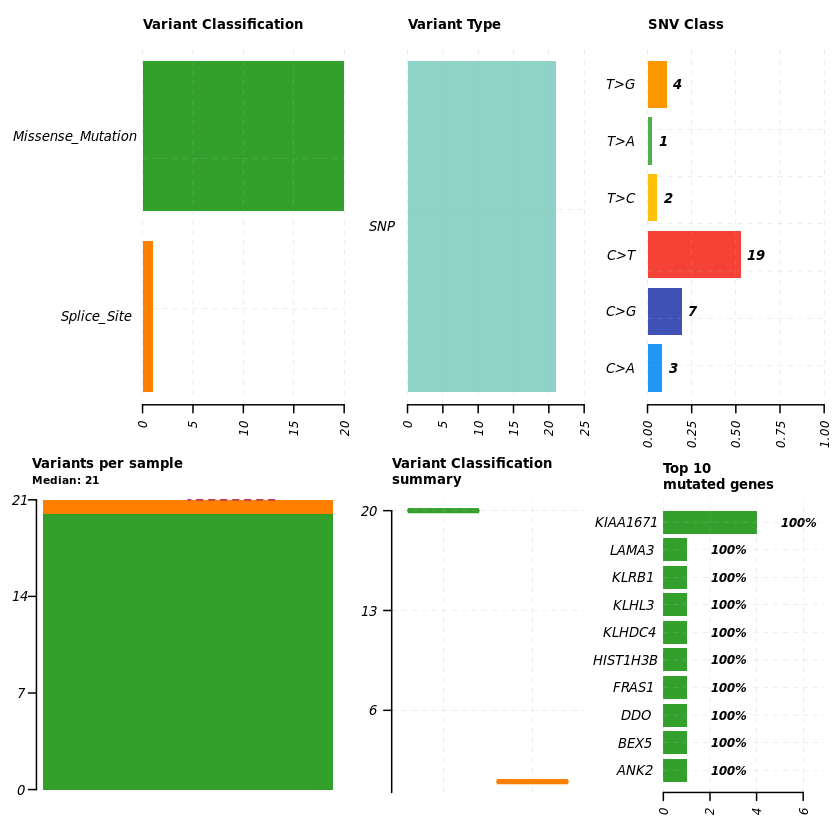

In [140]:
plotmafSummary(maf = maf_obj, rmOutlier = TRUE, addStat = 'median', dashboard = TRUE, titvRaw = FALSE)

Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


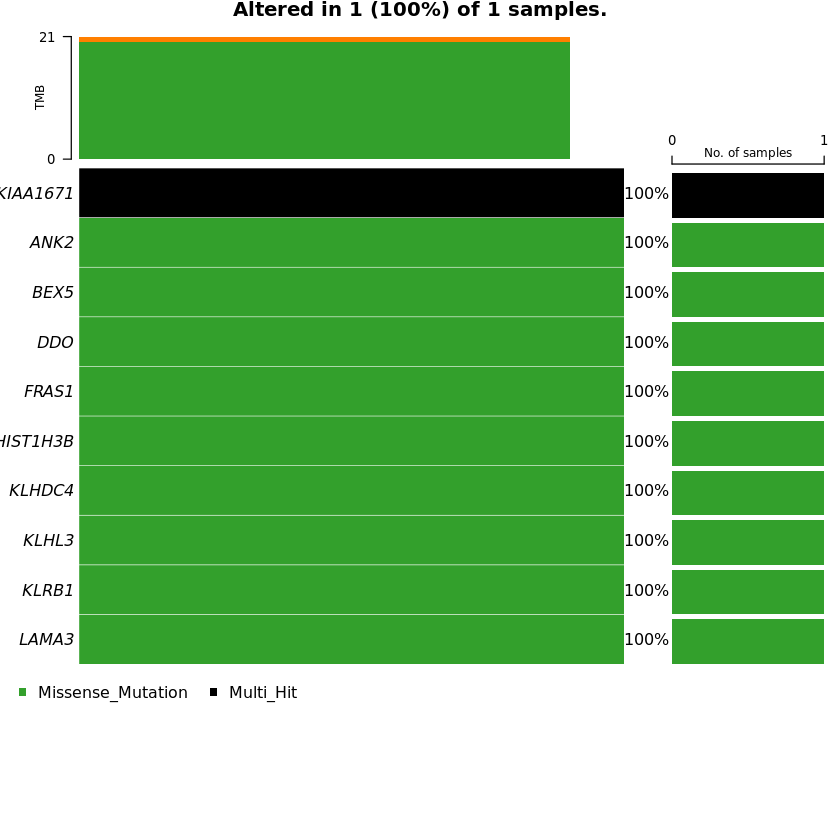

In [99]:
oncoplot(maf = maf_obj, top = 10)

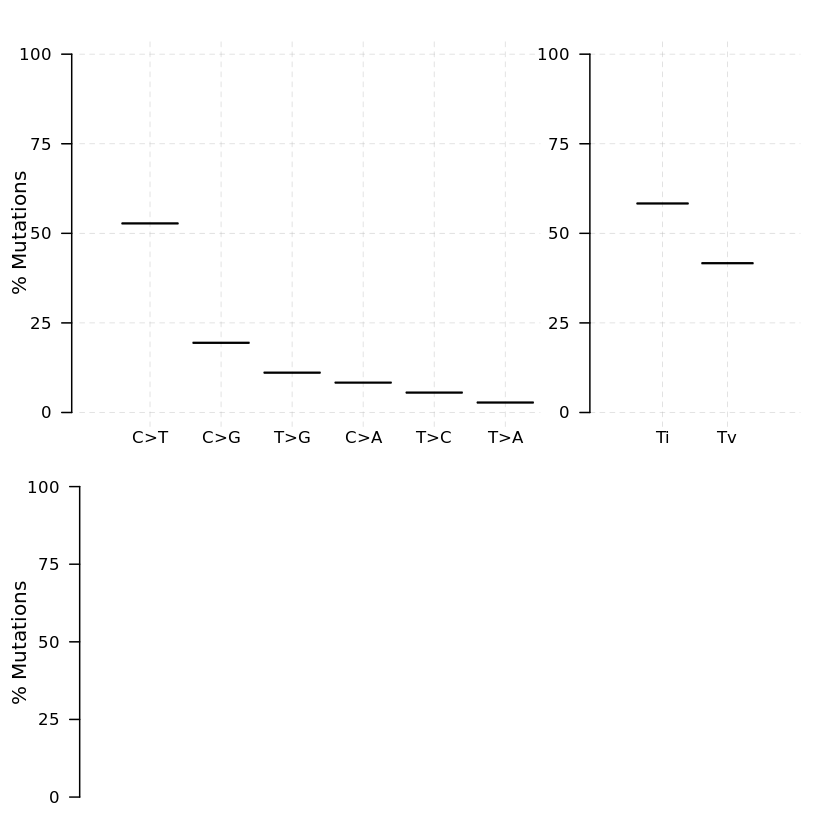

In [100]:
maf_obj.titv = titv(maf = maf_obj, plot = FALSE, useSyn = TRUE)
#plot titv summary
plotTiTv(res = maf_obj.titv)
